Plot the output of the direct output of the matlab simulink

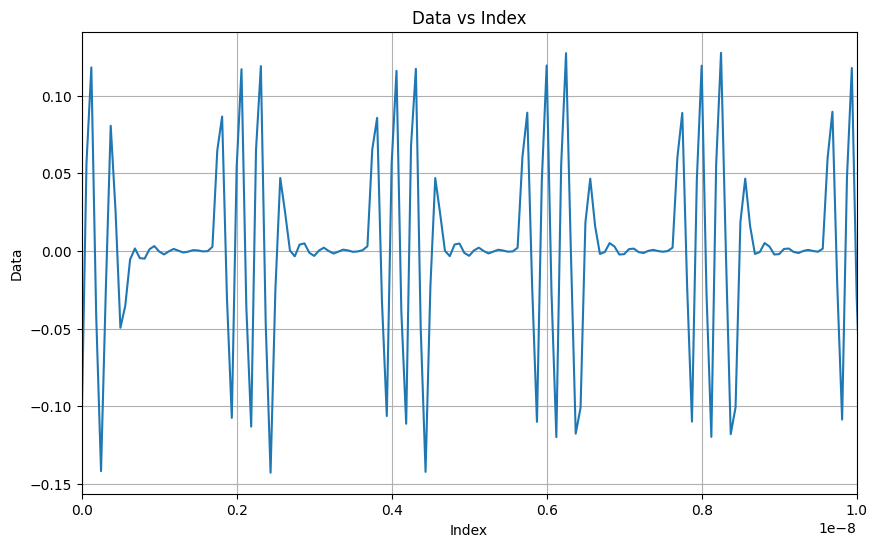

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file from the csv folder in the current directory
csv_path = '../csv/data16.csv'
df = pd.read_csv(csv_path)

# 绘制Data列随Index的变化
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['data'])
plt.xlabel('Index')
plt.ylabel('Data')
plt.title('Data vs Index')
plt.grid(True)
plt.xlim(0, 1e-8)
plt.show()


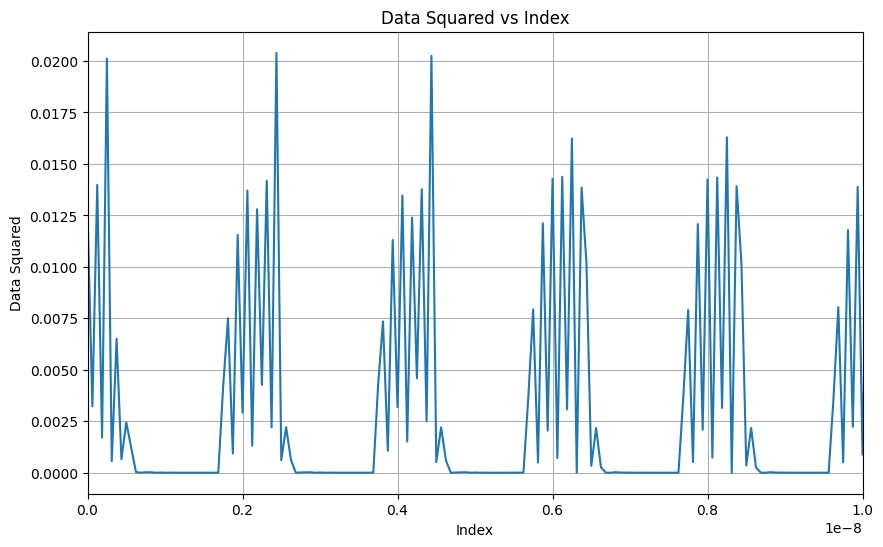

In [4]:
# Calculate the square of the data
df['Data_Squared'] = df['data'] ** 2
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Data_Squared'])
plt.xlabel('Index')
plt.ylabel('Data Squared')
plt.title('Data Squared vs Index')
plt.grid(True)
plt.xlim(0, 1e-8)
plt.show()

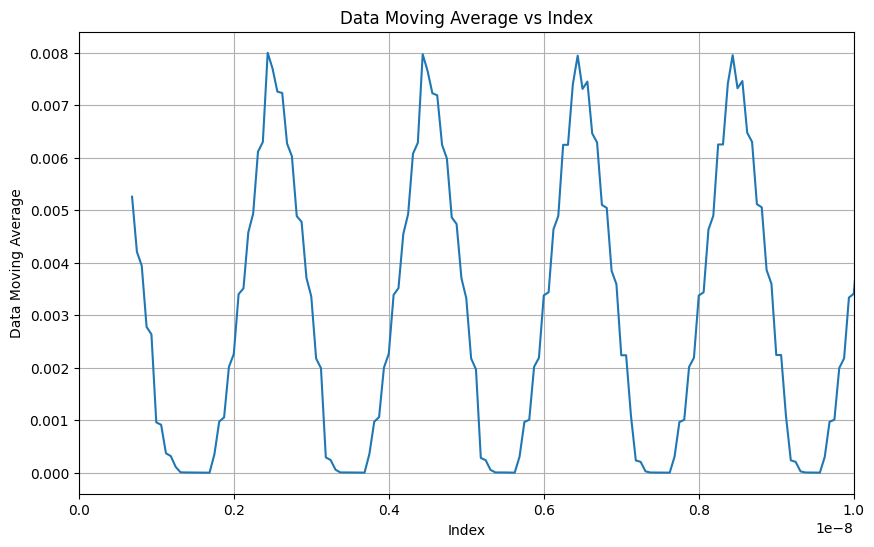

In [8]:
# apply a moving average with a window size of 32 * 0.4
# (32 = 16e9(sample rate) / 500e6 (symbol rate))
df['Data_MA'] = df['Data_Squared'].rolling(window=int(32 * 0.4)).mean()
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Data_MA'])
plt.xlabel('Index')
plt.ylabel('Data Moving Average')
plt.title('Data Moving Average vs Index')
plt.grid(True)
plt.xlim(0, 1e-8)
plt.show()

Found 2499 peaks
Peak positions (Index) and corresponding values:
Peak 1: Index = 2.4375000000000003e-09, Value = 0.0080
Peak 2: Index = 4.4375e-09, Value = 0.0080
Peak 3: Index = 6.4375000000000006e-09, Value = 0.0079
Peak 4: Index = 8.4375e-09, Value = 0.0080
Peak 5: Index = 1.03125e-08, Value = 0.0078
Peak 6: Index = 1.23125e-08, Value = 0.0078
Peak 7: Index = 1.4437500000000001e-08, Value = 0.0066
Peak 8: Index = 1.64375e-08, Value = 0.0066
Peak 9: Index = 1.84375e-08, Value = 0.0080
Peak 10: Index = 2.04375e-08, Value = 0.0080
Peak 11: Index = 2.24375e-08, Value = 0.0079
Peak 12: Index = 2.4437500000000003e-08, Value = 0.0080
Peak 13: Index = 2.63125e-08, Value = 0.0078
Peak 14: Index = 2.8312500000000003e-08, Value = 0.0078
Peak 15: Index = 3.0437500000000004e-08, Value = 0.0066
Peak 16: Index = 3.24375e-08, Value = 0.0066
Peak 17: Index = 3.44375e-08, Value = 0.0080
Peak 18: Index = 3.643750000000001e-08, Value = 0.0080
Peak 19: Index = 3.84375e-08, Value = 0.0079
Peak 20: Index

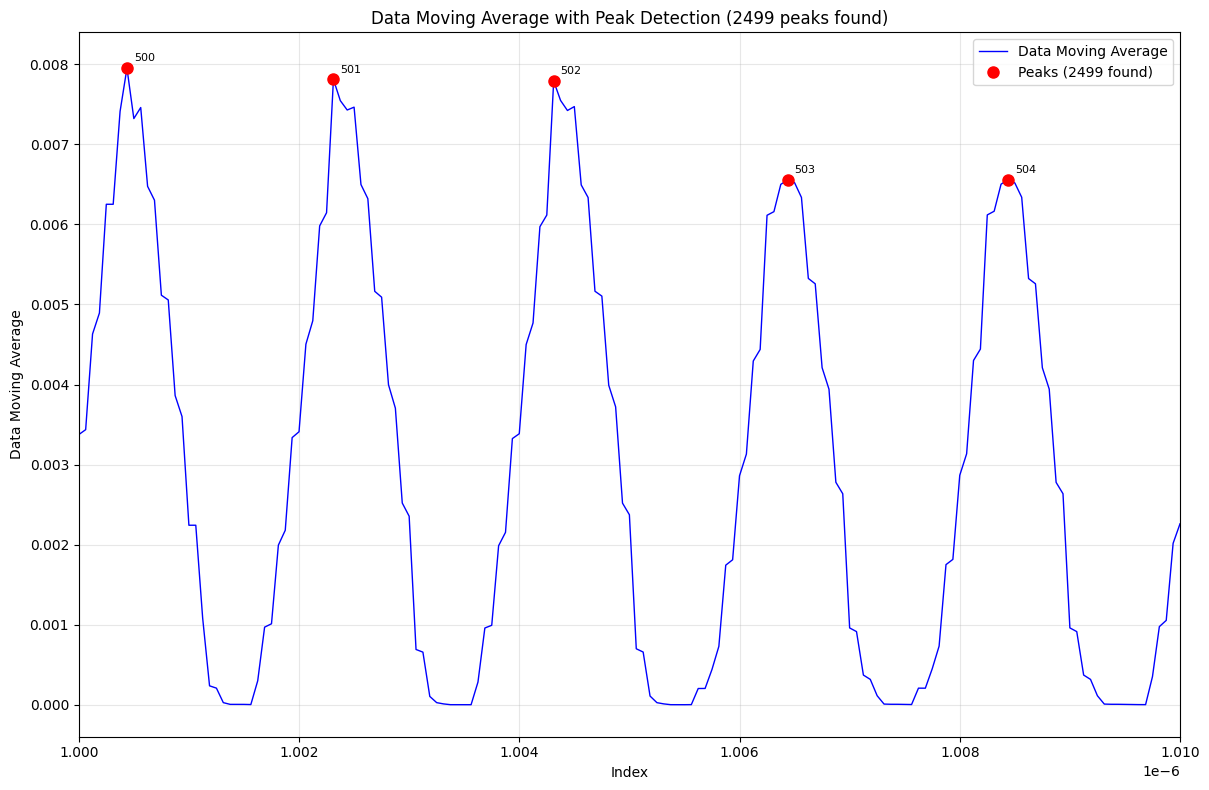


Peak distance statistics:
Average distance: 0.000000
Minimum distance: 0.000000
Maximum distance: 0.000000
Distance standard deviation: 0.000000


In [11]:
from scipy.signal import find_peaks
import numpy as np

# Ensure we have moving average data
if 'Data_MA' not in df.columns:
    df['Data_MA'] = df['Data_Squared'].rolling(window=int(32 * 0.4)).mean()

# Remove NaN values
data_ma_clean = df['Data_MA'].dropna()
index_clean = df.loc[data_ma_clean.index, 'time']

# Find all peak positions
# Set peak detection parameters
# height: peak height threshold
# distance: minimum distance between peaks (to prevent detecting adjacent noise peaks)
# prominence: peak prominence
peaks, properties = find_peaks(data_ma_clean, 
                               height=0.005,  # Only detect peaks with height > 0.5
                               distance=28,  # Minimum distance of 200 sample points between peaks
                               prominence=0.003)  # Peak prominence

# Get actual Index values corresponding to peaks
peak_indices = index_clean.iloc[peaks].values
peak_values = data_ma_clean.iloc[peaks].values

print(f"Found {len(peaks)} peaks")
print("Peak positions (Index) and corresponding values:")
for i, (idx, val) in enumerate(zip(peak_indices, peak_values)):
    print(f"Peak {i+1}: Index = {idx}, Value = {val:.4f}")

# Visualize peak positions
plt.figure(figsize=(12, 8))
plt.plot(index_clean, data_ma_clean, 'b-', label='Data Moving Average', linewidth=1)
plt.plot(peak_indices, peak_values, 'ro', markersize=8, label=f'Peaks ({len(peaks)} found)')

# Annotate peak positions
for i, (idx, val) in enumerate(zip(peak_indices, peak_values)):
    plt.annotate(f'{i+1}', (idx, val), xytext=(5, 5), textcoords='offset points', 
                fontsize=8, ha='left')

plt.xlabel('Index')
plt.ylabel('Data Moving Average')
plt.title(f'Data Moving Average with Peak Detection ({len(peaks)} peaks found)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.xlim(1e-6, 1e-6+1e-8)
plt.show()

# Calculate distance statistics between peaks
if len(peak_indices) > 1:
    peak_distances = np.diff(peak_indices)
    print(f"\nPeak distance statistics:")
    print(f"Average distance: {np.mean(peak_distances):.6f}")
    print(f"Minimum distance: {np.min(peak_distances):.6f}")
    print(f"Maximum distance: {np.max(peak_distances):.6f}")
    print(f"Distance standard deviation: {np.std(peak_distances):.6f}")

In [13]:
# More detailed peak analysis
print("="*60)
print("Detailed Peak Analysis Report")
print("="*60)

# Classify peaks based on height
high_peaks = []
medium_peaks = []
low_peaks = []

for i, (idx, val) in enumerate(zip(peak_indices, peak_values)):
    if val > 2.5:
        high_peaks.append((i+1, idx, val))
    elif val > 2.0:
        medium_peaks.append((i+1, idx, val))
    else:
        low_peaks.append((i+1, idx, val))

print(f"\nPeak classification:")
print(f"High peaks (>2.5): {len(high_peaks)} peaks")
for peak_num, idx, val in high_peaks:
    print(f"  Peak {peak_num}: Index {idx}, Value {val:.4f}")

print(f"\nMedium peaks (2.0-2.5): {len(medium_peaks)} peaks")
for peak_num, idx, val in medium_peaks:
    print(f"  Peak {peak_num}: Index {idx}, Value {val:.4f}")

print(f"\nLow peaks (<2.0): {len(low_peaks)} peaks")
for peak_num, idx, val in low_peaks:
    print(f"  Peak {peak_num}: Index {idx}, Value {val:.4f}")

# Create DataFrame of peak positions for analysis
peaks_df = pd.DataFrame({
    'Peak_Number': range(1, len(peak_indices)+1),
    'Index': peak_indices,
    'Value': peak_values,
    'Category': ['High' if v > 2.5 else 'Medium' if v > 2.0 else 'Low' for v in peak_values]
})

# Calculate distances between peaks
if len(peak_indices) > 1:
    peaks_df['Distance_to_Next'] = np.concatenate([np.diff(peak_indices), [np.nan]])

print(f"\nPeak data table:")
print(peaks_df.to_string(index=False))

# Save peak data to CSV file
output_path = '../csv/detected_peaks.csv'
peaks_df.to_csv(output_path, index=False)
print(f"\nPeak data saved to: {output_path}")

# Periodicity analysis
print(f"\nPeriodicity analysis:")
if len(peak_distances) > 0:
    expected_period = 32  # Based on parameters in code comments
    actual_mean_period = np.mean(peak_distances)
    period_deviation = abs(actual_mean_period - expected_period)
    
    print(f"Expected period: {expected_period}")
    print(f"Actual average period: {actual_mean_period:.2f}")
    print(f"Deviation: {period_deviation:.2f} ({period_deviation/expected_period*100:.1f}%)")
    print(f"Period stability (std/mean): {np.std(peak_distances)/np.mean(peak_distances)*100:.1f}%")

Detailed Peak Analysis Report

Peak classification:
High peaks (>2.5): 0 peaks

Medium peaks (2.0-2.5): 0 peaks

Low peaks (<2.0): 2499 peaks
  Peak 1: Index 2.4375000000000003e-09, Value 0.0080
  Peak 2: Index 4.4375e-09, Value 0.0080
  Peak 3: Index 6.4375000000000006e-09, Value 0.0079
  Peak 4: Index 8.4375e-09, Value 0.0080
  Peak 5: Index 1.03125e-08, Value 0.0078
  Peak 6: Index 1.23125e-08, Value 0.0078
  Peak 7: Index 1.4437500000000001e-08, Value 0.0066
  Peak 8: Index 1.64375e-08, Value 0.0066
  Peak 9: Index 1.84375e-08, Value 0.0080
  Peak 10: Index 2.04375e-08, Value 0.0080
  Peak 11: Index 2.24375e-08, Value 0.0079
  Peak 12: Index 2.4437500000000003e-08, Value 0.0080
  Peak 13: Index 2.63125e-08, Value 0.0078
  Peak 14: Index 2.8312500000000003e-08, Value 0.0078
  Peak 15: Index 3.0437500000000004e-08, Value 0.0066
  Peak 16: Index 3.24375e-08, Value 0.0066
  Peak 17: Index 3.44375e-08, Value 0.0080
  Peak 18: Index 3.643750000000001e-08, Value 0.0080
  Peak 19: Index 3.

In [14]:
# Peak detection summary
print("\n" + "="*50)
print("Peak Detection Summary")
print("="*50)
print(f"Total detected peaks: {len(peak_indices)}")
print(f"Peak position range: Index {peak_indices.min()} to {peak_indices.max()}")
print(f"Peak amplitude range: {peak_values.min():.4f} to {peak_values.max():.4f}")
print(f"Average peak distance: {np.mean(peak_distances):.2f} ± {np.std(peak_distances):.2f}")
print(f"Total data length: {len(df)} sample points")
print(f"Peak density: {len(peak_indices)/len(df)*1000:.2f} peaks/thousand sample points")

# Quick look at first 5 and last 5 peaks
print(f"\nFirst 5 peaks:")
for i in range(min(5, len(peak_indices))):
    print(f"  Peak {i+1}: Index {peak_indices[i]}, Value {peak_values[i]:.4f}")

print(f"\nLast 5 peaks:")
for i in range(max(0, len(peak_indices)-5), len(peak_indices)):
    print(f"  Peak {i+1}: Index {peak_indices[i]}, Value {peak_values[i]:.4f}")


Peak Detection Summary
Total detected peaks: 2499
Peak position range: Index 2.4375000000000003e-09 to 4.9984375e-06
Peak amplitude range: 0.0066 to 0.0080
Average peak distance: 0.00 ± 0.00
Total data length: 80001 sample points
Peak density: 31.24 peaks/thousand sample points

First 5 peaks:
  Peak 1: Index 2.4375000000000003e-09, Value 0.0080
  Peak 2: Index 4.4375e-09, Value 0.0080
  Peak 3: Index 6.4375000000000006e-09, Value 0.0079
  Peak 4: Index 8.4375e-09, Value 0.0080
  Peak 5: Index 1.03125e-08, Value 0.0078

Last 5 peaks:
  Peak 2495: Index 4.990437500000001e-06, Value 0.0066
  Peak 2496: Index 4.9924375e-06, Value 0.0066
  Peak 2497: Index 4.9944375e-06, Value 0.0080
  Peak 2498: Index 4.9964375e-06, Value 0.0080
  Peak 2499: Index 4.9984375e-06, Value 0.0080


In [ ]:
# Build periodic impulse function to fit the peaks
print("\n" + "="*60)
print("Periodic Impulse Function Fitting")
print("="*60)

# Ignore the anomalous first peak, use more stable subsequent peaks to calculate period
stable_peaks = peak_indices[1:]  # Remove the first anomalous large peak
stable_periods = np.diff(stable_peaks)

# Calculate more accurate period parameters
if len(stable_periods) > 0:
    avg_period = np.mean(stable_periods)
    frequency = 1 / avg_period
    offset = stable_peaks[0]  # Use the second peak as the offset starting point
    
    print(f"Stable peak analysis (ignoring first anomalous peak):")
    print(f"  Number of peaks used: {len(stable_peaks)}")
    print(f"  Average period: {avg_period:.2f} index points")
    print(f"  Frequency: {frequency:.6f} cycles/index")
    print(f"  Offset: {offset} index")
    print(f"  Period standard deviation: {np.std(stable_periods):.2f}")
    
    # Build ideal periodic impulse function
    def create_periodic_impulse(length, period, offset, amplitude=1.0, width=1):
        """
        Create periodic impulse function
        
        Parameters:
        - length: signal length
        - period: impulse period
        - offset: position of first impulse
        - amplitude: impulse amplitude
        - width: impulse width (in sample points)
        """
        impulse = np.zeros(length)
        
        # Calculate all impulse positions
        pulse_positions = []
        pos = offset
        while pos < length:
            pulse_positions.append(int(pos))
            pos += period
        
        # Set values at each impulse position
        for pos in pulse_positions:
            start = max(0, pos - width//2)
            end = min(length, pos + width//2 + 1)
            impulse[start:end] = amplitude
            
        return impulse, pulse_positions
    
    # Create fitted periodic impulse signal
    data_length = len(index_clean)
    fitted_impulse, pulse_positions = create_periodic_impulse(
        length=data_length, 
        period=avg_period, 
        offset=0,  # Start from data beginning
        amplitude=np.mean(peak_values[1:]),  # Use average height of stable peaks
        width=5
    )
    
    print(f"\nFitting results:")
    print(f"  Generated impulse count: {len(pulse_positions)}")
    print(f"  Impulse amplitude: {np.mean(peak_values[1:]):.4f}")
    
    # Visualize fitting results
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Original data and detected peaks
    plt.subplot(3, 1, 1)
    plt.plot(index_clean, data_ma_clean, 'b-', alpha=0.7, label='Original Moving Average')
    plt.plot(peak_indices, peak_values, 'ro', markersize=8, label=f'Detected Peaks ({len(peak_indices)})')
    plt.xlabel('Index')
    plt.ylabel('Amplitude')
    plt.title('Original Data and Detected Peaks')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Fitted periodic impulse function
    plt.subplot(3, 1, 2)
    plt.plot(index_clean, fitted_impulse, 'g-', linewidth=2, label='Fitted Periodic Impulse')
    plt.plot(pulse_positions, [np.mean(peak_values[1:])]*len(pulse_positions), 'go', 
             markersize=6, label=f'Impulse Positions ({len(pulse_positions)})')
    plt.xlabel('Index')
    plt.ylabel('Amplitude')
    plt.title(f'Fitted Periodic Impulse Function (period={avg_period:.1f})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 3: Overlay comparison of original data and fitted function
    plt.subplot(3, 1, 3)
    plt.plot(index_clean, data_ma_clean, 'b-', alpha=0.6, label='Original Data')
    plt.plot(index_clean, fitted_impulse, 'r--', linewidth=2, alpha=0.8, label='Fitted Impulse')
    plt.plot(peak_indices, peak_values, 'ko', markersize=4, label='Detected Peaks')
    plt.xlabel('Index')
    plt.ylabel('Amplitude')
    plt.title('Original Data vs Fitted Function Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.xlim(1e-7, 2e-7)
    plt.show()
    
else:
    print("Unable to calculate stable period parameters")


Periodic Impulse Function Fitting
Stable peak analysis (ignoring first anomalous peak):
  Number of peaks used: 2498
  Average period: 0.00 index points
  Frequency: 500003519.873597 cycles/index
  Offset: 4.50390625e-09 index
  Period standard deviation: 0.00
